<a href="https://colab.research.google.com/github/vaish-8468/Machine_Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

Sepal Length

Sepal Width

Petal Length

Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

Setosa

Versicolour

Virginica

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=iris.target

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

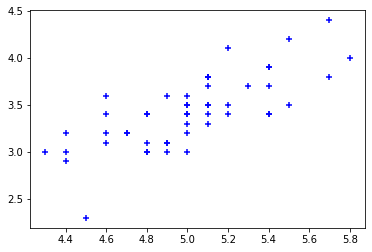

In [ ]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='blue',marker='+')

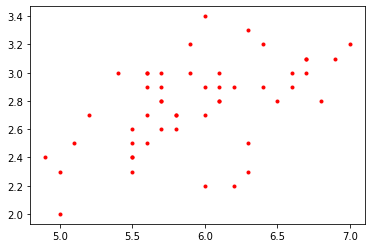

In [ ]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='.')

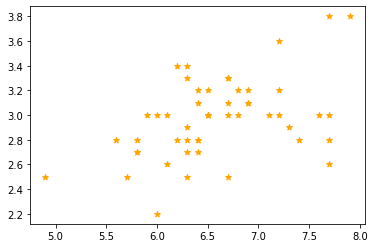

In [ ]:
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='orange',marker='*')

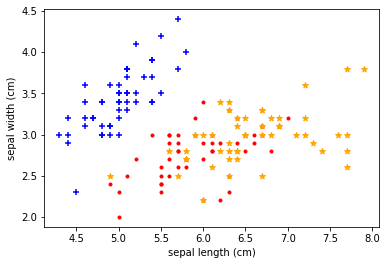

In [ ]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='blue',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='.')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='orange',marker='*')

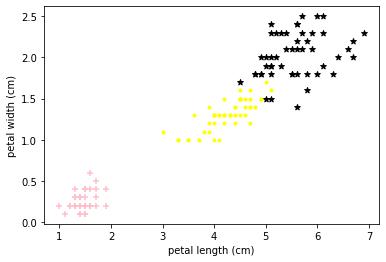

In [ ]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='pink',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='yellow',marker='.')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black',marker='*')

In [ ]:
X=df.drop(['target','flower_name'],axis='columns')
Y=df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear', C=100)

In [ ]:
model.fit(X_train,y_train)

SVC(C=100, kernel='linear')

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='rbf', C=1, gamma=1)

In [ ]:
model.fit(X_train,y_train)

SVC(C=1, gamma=1)

In [ ]:
model.score(X_test,y_test)

0.9666666666666667